In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
x_train[0].shape

(28, 28)

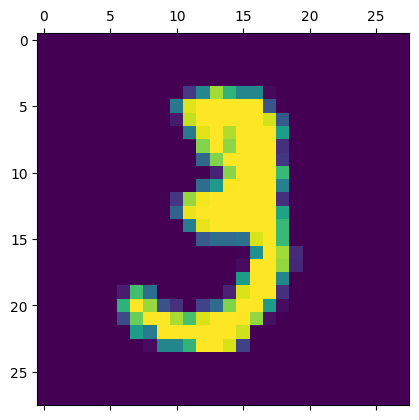

In [5]:
plt.matshow(x_train[10])

In [6]:
y_train[10]

3

In [7]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [17]:
x_train = x_train/255
x_test = x_test/255

In [18]:
#convert 2d array representation from above to 1d

x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_train_flattened.shape

(60000, 784)

In [19]:
x_test_flattened = x_test.reshape(len(x_test), 28*28)
x_test_flattened.shape

(10000, 784)

In [39]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(optimizer='adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics =['accuracy']
              )

model.fit(x_train_flattened, y_train, epochs=8)

Epoch 1/8


c:\Users\Jay\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5016 - loss: 2.2450
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6905 - loss: 2.0259
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7340 - loss: 1.8368
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7541 - loss: 1.6652
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7693 - loss: 1.5156
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7848 - loss: 1.3888
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7956 - loss: 1.2800
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8053 - loss: 1.1805


In [40]:
model.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7975 - loss: 1.1666


[1.1017308235168457, 0.8259999752044678]

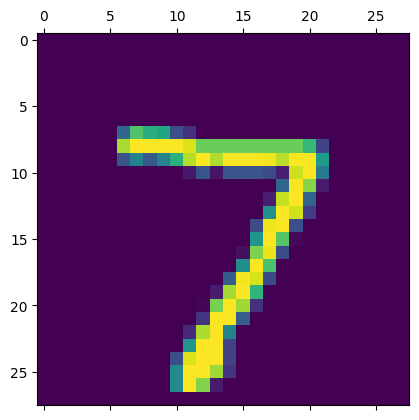

In [41]:
plt.matshow(x_test[0])

In [42]:
y_predicted = model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [43]:
y_predicted[0]

array([0.24197161, 0.30491024, 0.2898251 , 0.3810739 , 0.4606874 ,
       0.35491297, 0.19903891, 0.88806915, 0.3219677 , 0.6209558 ],
      dtype=float32)

In [44]:
np.argmax(y_predicted[0])

7

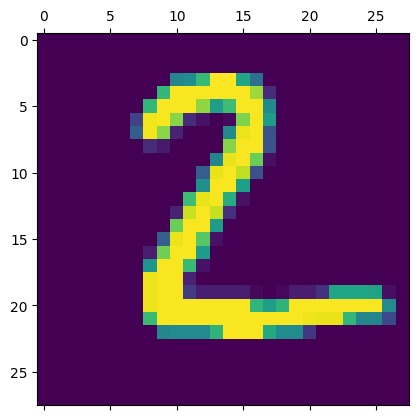

In [45]:
plt.matshow(x_test[1])

In [46]:
y_predicted[1]

array([0.3290048 , 0.33542943, 0.67445225, 0.5591153 , 0.09905221,
       0.4476907 , 0.5581541 , 0.06435501, 0.35574514, 0.09475792],
      dtype=float32)

In [47]:
np.argmax(y_predicted[1])

2

In [48]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [65]:
cm = tf.math.confusion_matrix(labels = y_test, predictions=y_predicted_labels)

In [50]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 924,    1,    5,    9,    0,    4,   30,    1,    6,    0],
       [   0, 1102,    7,    4,    0,    1,    4,    0,   17,    0],
       [  18,   66,  800,   29,   20,    0,   33,   23,   42,    1],
       [   5,   30,   28,  876,    1,    3,    7,   20,   28,   12],
       [   2,   31,    3,    0,  809,    0,   29,    3,    4,  101],
       [  30,   82,    5,  164,   27,  485,   28,   27,   21,   23],
       [  21,   37,    8,    0,   14,   14,  864,    0,    0,    0],
       [   2,   63,   14,    2,   12,    0,    2,  891,    9,   33],
       [  20,   72,   10,   77,   12,    9,   17,   18,  704,   35],
       [  20,   32,    6,   11,   68,    1,    1,   55,   10,  805]])>

Text(95.72222222222221, 0.5, 'Truth')

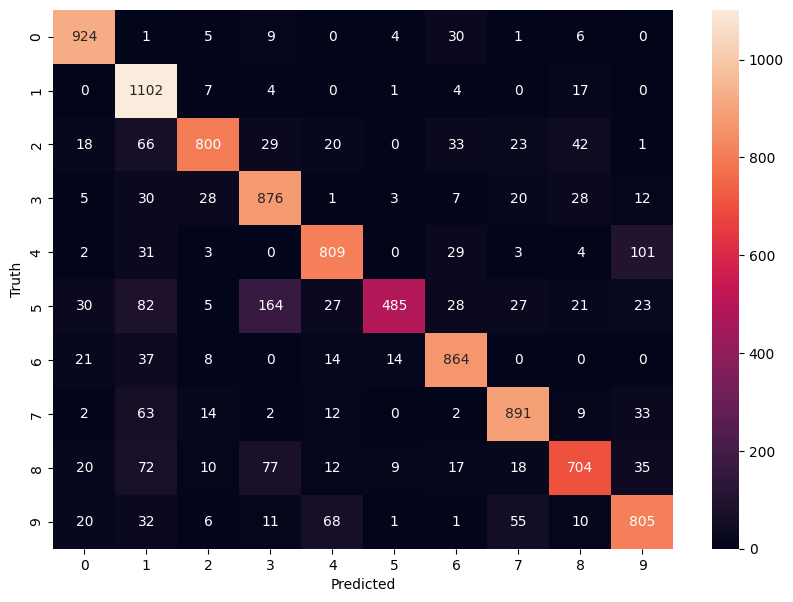

In [51]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [52]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10,activation='sigmoid') #hidden layer
])
model.compile(optimizer='adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics =['accuracy']
              )

model.fit(x_train_flattened, y_train, epochs=8)

Epoch 1/8


c:\Users\Jay\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5361 - loss: 1.7770
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8489 - loss: 0.6110
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8848 - loss: 0.4352
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8975 - loss: 0.3735
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9021 - loss: 0.3459
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9090 - loss: 0.3228
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9106 - loss: 0.3107
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9154 - loss: 0.2962


In [53]:
model.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9024 - loss: 0.3248


[0.286162793636322, 0.9158999919891357]

Text(95.72222222222221, 0.5, 'Truth')

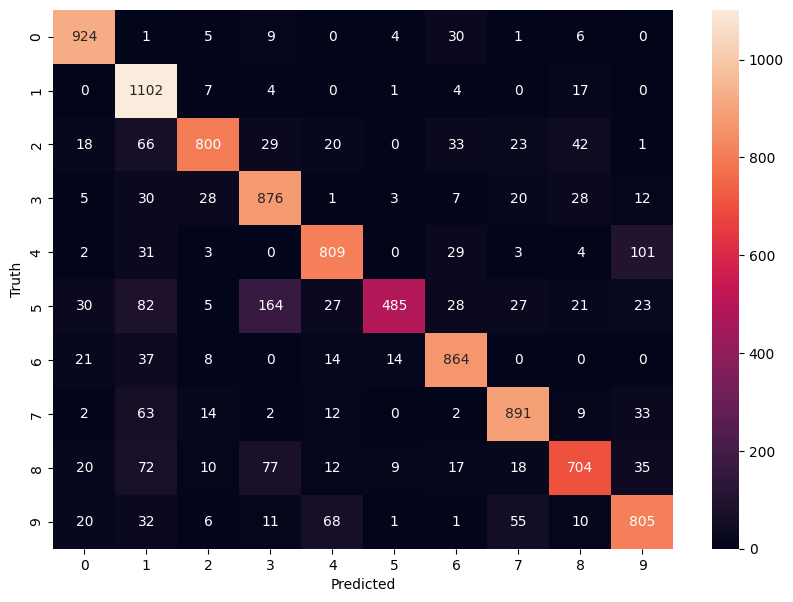

In [54]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [62]:
#if dont want to remake flattened 

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='elu'),
    keras.layers.Dense(10,activation='softmax') #hidden layer
])
model.compile(optimizer='adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics =['accuracy']
              )

model.fit(x_train, y_train, epochs=8)

Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6000 - loss: 1.5337
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8809 - loss: 0.4457
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9011 - loss: 0.3523
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9082 - loss: 0.3233
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9132 - loss: 0.3054
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9156 - loss: 0.2922
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9165 - loss: 0.2915
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9196 - loss: 0.2824


In [63]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9091 - loss: 0.3109


[0.27489393949508667, 0.9217000007629395]

Text(95.72222222222221, 0.5, 'Truth')

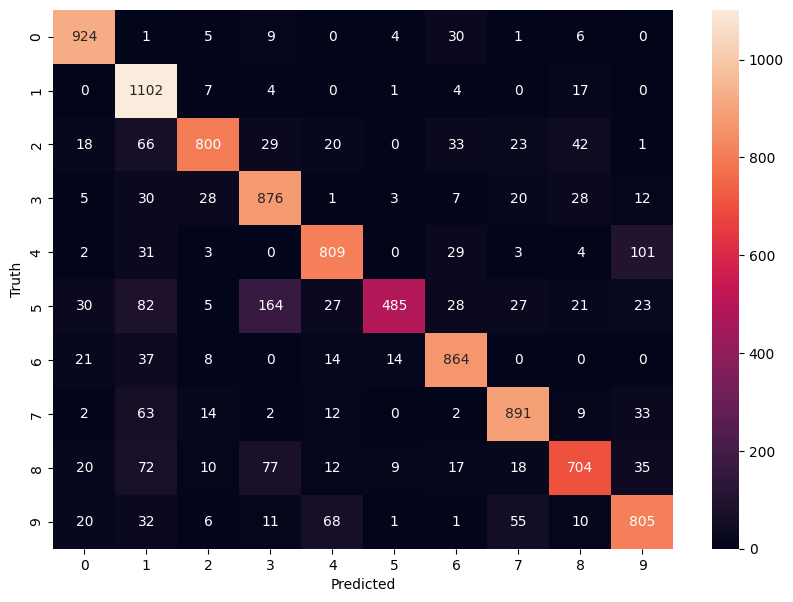

In [66]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')